# 1. Importar librerias

In [156]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier

#Importar módulo de funciones
import sys
sys.path.insert(0, 'utils')  # Añadir el directorio 'utils' al PATH
import funciones
from importlib import reload
reload(funciones)  # Recarga el módulo

<module 'funciones' from 'c:\\Users\\Usuario\\OneDrive - Universidad de Antioquia\\Documentos\\Universidad\\Analitica3\\recursos_humanos\\utils\\funciones.py'>

# 2. Obtener datos

#### Importar datos

In [196]:
df_log =pd.read_csv('data/seleccion_log.csv')
df_target =pd.read_csv('data/base_target.csv')
df_anova =pd.read_csv('data/seleccion_anova.csv')

#### Separar variable objetivo y hacer el split

In [197]:
X= df_anova
y= df_target.target

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# 3. Busqueda de hiperparametros

## 3.1 Decision Tree Classifier

#### Definir grilla

In [198]:
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,25,30],
              'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,20,30,40,50,60,],
              'min_samples_leaf': [3,5,7,9,11,13,15,17,19,21,23]}

#### Realizar busqueda

In [199]:
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
rand_s = RandomizedSearchCV(estimator=dt,
                            param_distributions=parameters,
                            n_iter=100,
                            scoring='f1',
                            cv=10,
                            verbose=False)
rand_s.fit(X, y)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      20, 25, 30, 25, 30],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 20, 30, 40,
                                                           50, 60],
                                        'min_samples_leaf': [3, 5, 7, 9, 11, 13,
                                                             15, 17, 19, 21,
                                                             23]},
                   scoring='f1', verbose=False)

#### Modelo con mejores hiperparametros

In [200]:
rand_s.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=20,
                       min_samples_leaf=11, random_state=42)

In [201]:
dt_final = rand_s.best_estimator_

#### Evaluación

In [202]:
eval=cross_validate(dt_final,X,y,cv=30,scoring="f1",return_train_score=True)

In [203]:
train_dt=pd.DataFrame(eval['train_score'])
test_dt=pd.DataFrame(eval['test_score'])
df=pd.concat([train_dt,test_dt], axis=1)
df.columns=['train_score','test_score']

In [204]:
df

,train_score,test_score
0,0.418854,0.281690
1,0.438636,0.366972
2,0.433748,0.296875
3,0.433170,0.275229
4,0.416413,0.296875
5,0.434066,0.330097
6,0.407728,0.238532
7,0.418500,0.236364
8,0.419440,0.342342
9,0.395284,0.326531


In [205]:
print(df['test_score'].mean())
df['train_score'].mean()

0.24932499390043483


0.41983476150210824

------------------------------ TRAIN ------------------------------


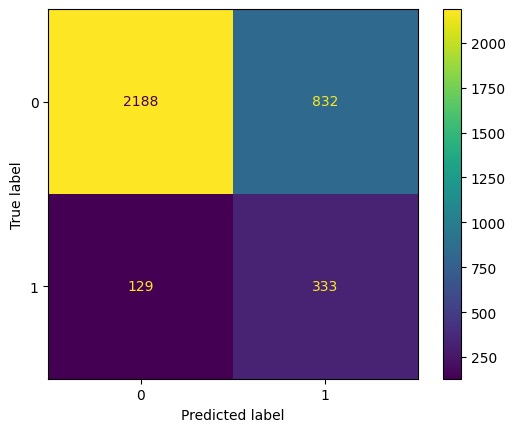

Precision: 0.28583690987124466
Recall: 0.7207792207792207
Especificidad: 0.7245033112582782
F1 score: 0.40934234787953294
Train score:  0.7240091901206204


(0.28583690987124466,
 0.7207792207792207,
 0.7245033112582782,
 0.40934234787953294)

In [206]:
funciones.metricas(dt_final,X_train,y_train,'TRAIN')

------------------------------ TEST ------------------------------


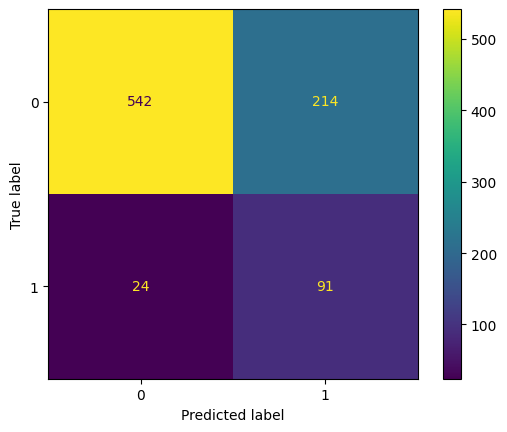

Precision: 0.2983606557377049
Recall: 0.7913043478260869
Especificidad: 0.716931216931217
F1 score: 0.43333333333333335
Train score:  0.7267508610792193


(0.2983606557377049,
 0.7913043478260869,
 0.716931216931217,
 0.43333333333333335)

In [207]:
funciones.metricas(dt_final,X_test,y_test,'TEST')

# 3.2 Logistic Regression

In [169]:
lr=LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1, )

In [170]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [171]:
eval2=cross_validate(lr,X,y,cv=30,scoring="precision",return_train_score=True)

In [172]:
train_lr=pd.DataFrame(eval2['train_score'])
test_lr=pd.DataFrame(eval2['test_score'])
df2=pd.concat([train_lr,test_lr], axis=1)
df2.columns=['train_score','test_score']

In [173]:
print(df2['test_score'].mean())
df2['train_score'].mean()

0.2826553653344906


0.26049063240411535

------------------------------ TRAIN ------------------------------


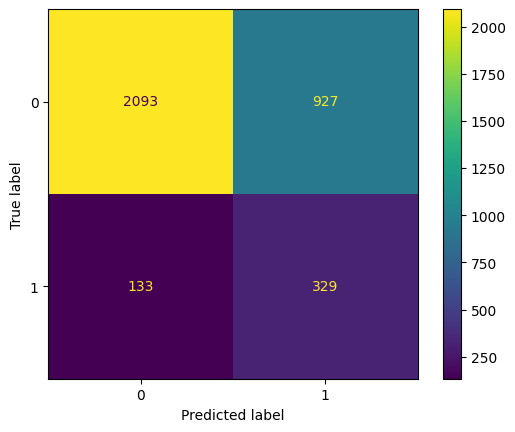

Precision: 0.2619426751592357
Recall: 0.7121212121212122
Especificidad: 0.6930463576158941
F1 score: 0.3830034924330617
Train score:  0.6955772544514647


(0.2619426751592357,
 0.7121212121212122,
 0.6930463576158941,
 0.3830034924330617)

In [174]:
funciones.metricas(lr,X_train,y_train,'TRAIN')

------------------------------ TEST ------------------------------


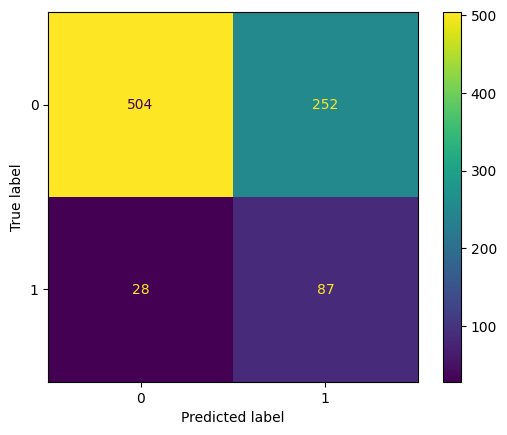

Precision: 0.25663716814159293
Recall: 0.7565217391304347
Especificidad: 0.6666666666666666
F1 score: 0.3832599118942731
Train score:  0.6785304247990815


(0.25663716814159293,
 0.7565217391304347,
 0.6666666666666666,
 0.3832599118942731)

In [175]:
funciones.metricas(lr,X_test,y_test,'TEST')

In [176]:
parameters = {'max_depth': [40,50,60,70],
              'max_features': [0.9,1],
              'max_leaf_nodes': [110,120,130],
              'min_samples_leaf': [3,5,7,9],
              'n_estimators': [800]}

In [177]:
ranfor = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

rand_s = RandomizedSearchCV(estimator=ranfor,
                            param_distributions=parameters,
                            n_iter=10,
                            scoring='f1',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'max_depth': [40, 50, 60, 70],
                                        'max_features': [0.9, 1],
                                        'max_leaf_nodes': [110, 120, 130],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'n_estimators': [800]},
                   scoring='f1', verbose=False)

In [178]:
rand_s.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=0.9,
                       max_leaf_nodes=120, min_samples_leaf=3, n_estimators=800,
                       n_jobs=-1, random_state=42)

In [179]:
rf=rand_s.best_estimator_

In [180]:
ranfor_opt = RandomForestClassifier(
    class_weight = 'balanced',
    max_depth = 30,
    max_features = 1,
    max_leaf_nodes = 190,
    min_samples_leaf = 3,
    n_estimators = 1000,
    n_jobs = -1,
    random_state = 42
)
ranfor_opt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,
                       max_leaf_nodes=190, min_samples_leaf=3,
                       n_estimators=1000, n_jobs=-1, random_state=42)

------------------------------ Train ------------------------------


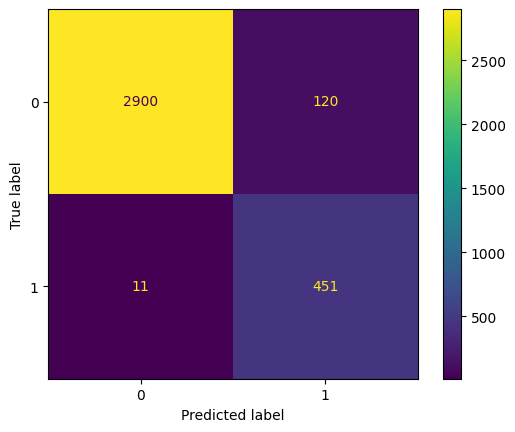

Precision: 0.7898423817863398
Recall: 0.9761904761904762
Especificidad: 0.9602649006622517
F1 score: 0.8731848983543079
Train score:  0.9623779437105112


(0.7898423817863398,
 0.9761904761904762,
 0.9602649006622517,
 0.8731848983543079)

In [181]:
funciones.metricas(ranfor_opt,X_train,y_train,'Train')

------------------------------ TEST ------------------------------


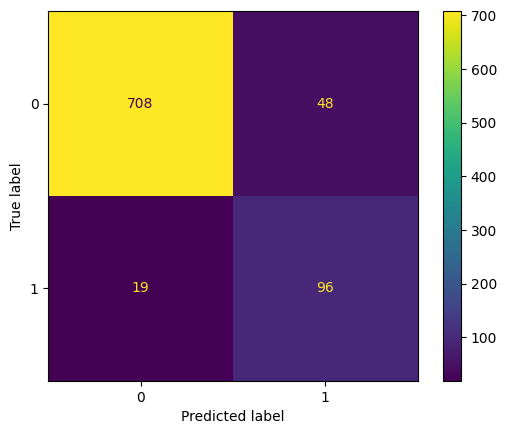

Precision: 0.6666666666666666
Recall: 0.8347826086956521
Especificidad: 0.9365079365079365
F1 score: 0.7413127413127412
Train score:  0.9230769230769231


(0.6666666666666666,
 0.8347826086956521,
 0.9365079365079365,
 0.7413127413127412)

In [182]:
funciones.metricas(ranfor_opt,X_test,y_test,'TEST')